<a target="_blank" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/025_intro_pandas.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

(intro-pandas-notebook)=
# Introduzione a Pandas

La libreria [Pandas](https://Pandas.pydata.org/docs/index.html) è delegata alla gestione e lettura dei dati provenienti da sorgenti eterogenee, tra cui fogli Excel, file CSV, o anche JSON e database di tipo SQL. 

Pandas dipenda da due strutture dati principali: 

- la `Series` che viene utilizzata per rappresentare righe o colonne di un DataFrame (molto simile ad un NumPy array),
- il DataFrame, una sorta di tabella, strutturata su colonne dove i dati di ciascuna unità di osservazione sono distribuiti per righe.

Lo scopo di questo capitolo è iniziare a prendere confidenza con i DataFrame ed imparare a manipolare i dati al loro interno. Per un approfondimento, consiglio il capitolo 10 di [Python for Data Analysis, 3E](https://wesmckinney.com/book/data-aggregation.html). 

Iniziamo a caricare le librerie necessarie.

In [1]:
import pandas as pd
import numpy as np
import statistics as st

## Series

In Pandas, una `Series` è un array unidimensionale composto da una sequenza di valori omogenei, simile ad un *ndarray*, accompagnato da un array di etichette chiamato "index". A differenza degli indici degli array Numpy, che sono sempre interi e partono da zero, gli oggetti `Series` supportano etichette personalizzate che possono essere, ad esempio, delle stringhe. Inoltre, gli oggetti `Series` possono contenere dati mancanti che vengono ignorati da molte delle operazioni della classe.

Il modo più semplice di creare un oggetto `Series` è di convertire una lista. Per esempio:


In [2]:
grades = pd.Series([27, 30, 24, 18, 22, 20, 29])


È possibile ottenere la rappresentazione dell'`array` dell'oggetto e dell'indice dell'oggetto `Series` tramite i suoi attributi `array` e `index`, rispettivamente.


In [3]:
grades.array


<PandasArray>
[27, 30, 24, 18, 22, 20, 29]
Length: 7, dtype: int64

In [4]:
grades.index


RangeIndex(start=0, stop=7, step=1)

Oppure, possiamo semplicemente stampare i contenuti dell'oggetto `Series` direttamente:

In [5]:
print(grades)

0    27
1    30
2    24
3    18
4    22
5    20
6    29
dtype: int64


Per accedere agli elementi di un oggetto `Series` si usano le parentesi quadre contenenti un indice:

In [6]:
grades[0]


27

In [7]:
grades[0:3]


0    27
1    30
2    24
dtype: int64

È possibile filtrare gli elementi di un oggetto `Series` con un array booleano:

In [8]:
grades > 24


0     True
1     True
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [9]:
grades[grades > 24]


0    27
1    30
6    29
dtype: int64

È possibile manipolare gli elementi di un oggetto `Series` con le normali operazioni aritmetiche:

In [10]:
grades / 10


0    2.7
1    3.0
2    2.4
3    1.8
4    2.2
5    2.0
6    2.9
dtype: float64

In [11]:
np.sqrt(grades)


0    5.196152
1    5.477226
2    4.898979
3    4.242641
4    4.690416
5    4.472136
6    5.385165
dtype: float64

Gli oggetti `Series` hanno diversi metodi per svolgere varie operazioni, per esempio per ricavare alcune statistiche descrittive:

In [12]:
[grades.count(), grades.mean(), grades.min(), grades.max(), grades.std(), grades.sum()]


[7, 24.285714285714285, 18, 30, 4.572172558506722, 170]

Molto utile è il metodo `.describe()`:

In [13]:
grades.describe()


count     7.000000
mean     24.285714
std       4.572173
min      18.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      30.000000
dtype: float64

## DataFrame

Un `pandas.DataFrame` è composto da righe e colonne. Ogni colonna di un dataframe è un oggetto `pandas.Series`: quindi, un dataframe è una collezione di serie. A differenza di un array NumPy, un dataframe può combinare più tipi di dati, come numeri e testo, ma i dati in ogni colonna sono dello stesso tipo.

Esistono molti modi per costruire un DataFrame. Il più semplice è quello di utilizzare un dizionario che include una o più liste o array Numpy di uguale lunghezza. Per esempio: 

In [14]:
data = {
    "name": [
        "Maria",
        "Anna",
        "Francesco",
        "Cristina",
        "Gianni",
        "Gabriella",
        "Stefano",
    ],
    "sex": ["f", "f", "m", "f", "m", "f", "m"],
    "group": ["a", "b", "a", "b", "b", "c", "a"],
    "x": [1, 2, 3, 4, 5, 6, 7],
    "y": [8, 9, 10, 11, 12, 13, 14],
    "z": [15, 16, 17, 18, 19, 20, 21],
}
frame = pd.DataFrame(data)
frame


,name,sex,group,x,y,z
0,Maria,f,a,1,8,15
1,Anna,f,b,2,9,16
2,Francesco,m,a,3,10,17
3,Cristina,f,b,4,11,18
4,Gianni,m,b,5,12,19
5,Gabriella,f,c,6,13,20
6,Stefano,m,a,7,14,21


Oppure possiamo procedere nel modo seguente:

In [15]:
lst1 = [1, 2, 3, 4, 5, 6, 7]
lst2 = [8, 9, 10, 11, 12, 13, 14]
lst3 = [14.4, 15.1, 16.7, 17.3, 18.9, 19.3, 20.2]
lst4 = ["a", "b", "a", "b", "b", "c", "a"]
lst5 = ["f", "f", "m", "f", "m", "f", "m"]
lst6 = ["Maria", "Anna", "Francesco", "Cristina", "Gianni", "Gabriella", "Stefano"]

df = pd.DataFrame()

df["x"] = lst1
df["y"] = lst2
df["z"] = lst3
df["group"] = lst4
df["sex"] = lst5
df["name"] = lst6

df


,x,y,z,group,sex,name
0,1,8,14.4,a,f,Maria
1,2,9,15.1,b,f,Anna
2,3,10,16.7,a,m,Francesco
3,4,11,17.3,b,f,Cristina
4,5,12,18.9,b,m,Gianni
5,6,13,19.3,c,f,Gabriella
6,7,14,20.2,a,m,Stefano


Molto spesso un DataFrame viene creato dal caricamento di dati da file. 

## Lettura di dati da file

Di solito la quantità di dati da analizzare è tale che non è pensabile di poterli immettere manualmente in una o più liste. Normalmente i dati sono memorizzati su un file ed è necessario importarli. La lettura (importazione) dei file è il primo fondamentale passo nel processo più generale di analisi dei dati. 

In un primo esempio, importiamo i dati da un repository remoto. 

In [2]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url, index_col='Name')

È possibile usare il metodo `.head()` per visualizzare le prime cinque righe. 

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Le statistiche descrittive per ciascuna colonna si ottengono con il metodo `describe`.

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In questo modo possiamo ottenere informazioni sui nomi dei passeggeri, la sopravvivenza (0 o 1), l'età, il prezzo del biglietto, ecc. Con le statistiche riassuntive vediamo che l'età media è di 29,7 anni, il prezzo massimo del biglietto è di 512 USD, il 38% dei passeggeri è sopravvissuto, ecc.

Supponiamo di essere interessati alla probabilità di sopravvivenza per diverse fasce d'età. Con due righe di codice, possiamo trovare l'età media di coloro che sono sopravvissuti o non sono sopravvissuti e generare gli istogrammi corrispondenti della distribuzione dell'età:

In [5]:
print(titanic.groupby("Survived")["Age"].mean())


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

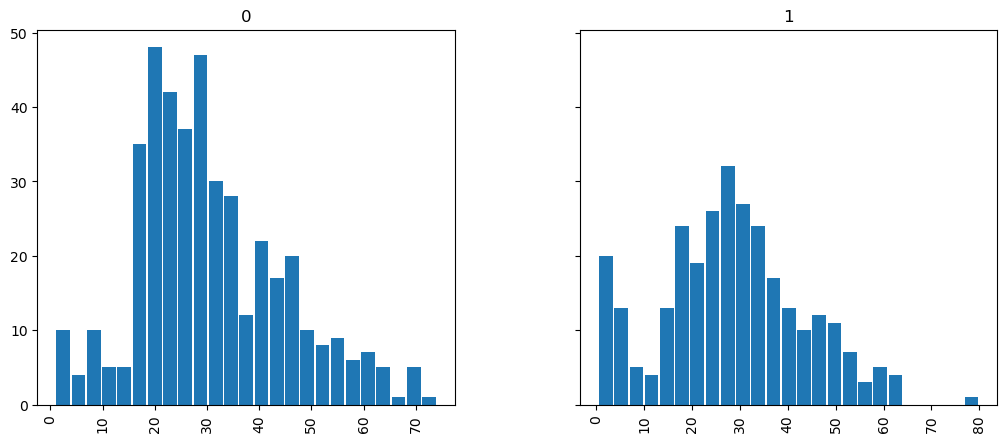

In [12]:
titanic.hist(
    column="Age",
    by="Survived",
    bins=25,
    figsize=(12, 5),
    layout=(1, 2),
    zorder=2,
    sharey=True,
    rwidth=0.9,
)


È chiaro che i dataframes di Pandas ci permettono di condurre analisi avanzate con pochi comandi, ma acquisire familiarità con la sintassi corretta richiede un po' di tempo.

Per fare un secondo esempio, importo i dati dal file `penguins.csv` situato nella directory "data" del mio computer. I dati relativi ai pinguini di Palmer sono resi disponibili da [Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) e dalla [Palmer station, Antarctica LTER](https://pallter.marine.rutgers.edu/). La seguente cella legge il contenuto del file `penguins.csv` e lo inserisce nell'oggetto `df` utilizzando la funzione `read_csv()` di Pandas.

In [13]:
df = pd.read_csv("data/penguins.csv")

Per il DataFrame `df` il significato delle colonne è il seguente:

- `species`: a factor denoting penguin type (Adélie, Chinstrap and Gentoo)
- `island`: a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)
- `bill_length_mm`: a number denoting bill length (millimeters)
- `bill_depth_mm`: a number denoting bill depth (millimeters)
- `flipper_length_mm`: an integer denoting flipper length (millimeters)
- `body_mass_g`: an integer denoting body mass (grams)
- `sex`: a factor denoting sexuality (female, male)
- `year`: the year of the study

Usiamo il metodo `.head()` per visualizzare le prime cinque righe. 

In [17]:
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


A volte potrebbero esserci dati estranei alla fine del file, quindi è importante anche controllare le ultime righe:

In [18]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


Le istruzioni seguenti ritornano le prime e le ultime tre righe del DataFrame.

In [19]:
display(df.head(3))
display(df.tail(3))

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


```{tip}
Un breve tutorial in formato video è disponibile tramite il seguente [collegamento](https://drive.google.com/file/d/12y7jZ0McvZBXThg6yjFgWx2ljQKrhoYR/view?usp=share_link), il quale illustra come effettuare la lettura dei dati da un file esterno in Visual Studio Code. 
```

L'attributo `.dtypes` restituisce il tipo dei dati:

In [20]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

Gli attributi più comunemente usati sono elencati di seguito:

| Attributo	 | Ritorna |
| ---------- | ------- |
| `dtypes`	 | Il tipo di dati in ogni colonna |
| `shape`	 | Una tupla con le dimensioni del DataFrame object (numero di righe, numero di colonne) |
| `index`	 | L'oggetto `Index` lungo le righe del DataFrame |
| `columns`	 |  Il nome delle colonne  |
| `values`	 | I dati contenuti nel DataFrame |
| `empty`	 | Check if the DataFrame object is empty |

Per esempio, l'istruzione della cella seguente restituisce l'elenco con i nomi delle colonne del DataFrame `df`:

In [21]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

L'attributo `.shape` ritorna il numero di righe e di colonne del DataFrame. Nel caso presente, ci sono 344 righe e 8 colonne.

In [22]:
df.shape

(344, 8)

Come abbiamo già visto in precedenza, un sommario dei dati si ottiene con il metodo `.describe()`:

In [23]:
df.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Una descrizione del DataFrame si ottiene con il metodo `.info()`. 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


```{warning}
Si noti che, alle volte, abbiamo utilizzato la sintassi `df.word` e talvolta la sintassi `df.word()`. Tecnicamente, la classe Pandas Dataframe ha sia attributi che metodi. Gli attributi sono `.word`, mentre i metodi sono `.word()` o `.word(arg1, arg2, ecc.)`. Per sapere se qualcosa è un metodo o un attributo è necessario leggere la documentazione.
```

Abbiamo visto in precedenza come possiamo leggere i dati in un dataframe utilizzando la funzione `read_csv()`. Pandas comprende anche molti altri formati, ad esempio utilizzando le funzioni `read_excel()`, `read_hdf()`, `read_json()`, ecc. (e i corrispondenti metodi per scrivere su file: `to_csv()`, `to_excel()`, `to_hdf()`, `to_json()`, ecc.).

## Gestione dei dati mancanti

Nell'output di `.info()` troviamo la colonna "Non-Null Count", ovvero il numero di dati non mancanti per ciascuna colonna del DataFrame. Da questo si nota che le colonne del DataFrame `df` contengono alcuni dati mancanti. La gestione dei dati mancanti è un argomento complesso. Per ora ci limitiamo ad escludere tutte le righe che, in qualche colonna, contengono dei dati mancanti.

Ottengo il numero di dati per ciascuna colonna del DataFrame:

In [25]:
df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Rimuovo i dati mancanti con il metodo `.dropna()`. L'argomento `inplace=True` specifica il DataFrame viene trasformato in maniera permanente.

In [26]:
df.dropna(inplace=True)


Verifico che i dati mancanti siano stati rimossi.

In [27]:
df.shape


(333, 8)

## Rinominare le colonne 

È possibile rinominare tutte le colonne passando al metodo `.rename()` un dizionario che specifica quali colonne devono essere mappate a cosa. Nella cella seguente faccio prima una copia del DataFrame con il metodo `copy()` e poi rinomino `sex` che diventa `gender` e `year` che diventa `year_of_the_study`:

In [28]:
df1 = df.copy()

# rename(columns={"OLD_NAME": "NEW_NAME"})
df1.rename(columns={"sex": "gender", "year": "year_of_the_study"}, inplace=True)
df1.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year_of_the_study
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


```{warning}
Si noti che in Python valgono le seguenti regole.

- Il nome di una variabile deve iniziare con una lettera o con il trattino basso (*underscore*) `_`.
- Il nome di una variabile non può iniziare con un numero.
- Un nome di variabile può contenere solo caratteri alfanumerici e il trattino basso (A-z, 0-9 e _).
- I nomi delle variabili fanno distinzione tra maiuscole e minuscole (`age`, `Age` e `AGE` sono tre variabili diverse).

Gli spazi non sono consentiti nel nome delle variabili: come separatore usate il trattino basso.
```

## Estrarre i dati dal DataFrame

Una parte cruciale del lavoro con i DataFrame è l'estrazione di sottoinsiemi di dati: vogliamo trovare le righe che soddisfano un determinato insieme di criteri, vogliamo isolare le colonne/righe di interesse, ecc. Per rispondere alle domande di interesse dell'analisi dei dati, molto spesso è necessario selezionare un sottoinsieme del DataFrame. 

### Colonne

È possibile estrarre una colonna da un DataFrame usando una notazione simile a quella che si usa per il dizionario (`DataFrame['word']`) o utilizzando la notazione `DataFrame.word`. Per esempio:

In [29]:
df["bill_length_mm"]


0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
339    55.8
340    43.5
341    49.6
342    50.8
343    50.2
Name: bill_length_mm, Length: 333, dtype: float64

In [30]:
df.bill_length_mm


0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
339    55.8
340    43.5
341    49.6
342    50.8
343    50.2
Name: bill_length_mm, Length: 333, dtype: float64

Se tra parentesi quadre indichiamo una lista di colonne come `df[['bill_length_mm','species']]` otteniamo un nuovo DataFrame costituito da queste colonne:

In [31]:
df[["bill_length_mm", "species"]]


,bill_length_mm,species
0,39.1,Adelie
1,39.5,Adelie
2,40.3,Adelie
4,36.7,Adelie
5,39.3,Adelie
...,...,...
339,55.8,Chinstrap
340,43.5,Chinstrap
341,49.6,Chinstrap
342,50.8,Chinstrap


### Righe

In un `pandas.DataFrame`, anche le righe hanno un nome. I nomi delle righe sono chiamati `index`:

In [14]:
df.index

RangeIndex(start=0, stop=344, step=1)

Ci sono vari metodi per estrarre sottoinsimi di righe da un DataFrame. È possibile fare riferimento ad un intervallo di righe mediante un indice di `slice`. Per esempio, possiamo ottenere le prime 3 righe del DataFrame `df` nel modo seguente:

In [15]:
df[0:3]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


Si noti che in Python una sequenza è determinata dal valore iniziale e quello finale *ma si interrompe ad n-1*. Pertanto, per selezionare una singola riga (per esempio, la prima) dobbiamo procedere nel modo seguente: 

In [33]:
df[0:1]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007


### Indicizzazione, selezione e filtraggio

Poiché l'oggetto DataFrame è bidimensionale, è possibile selezionare un sottoinsieme di righe e colonne utilizzando le etichette degli assi (`loc`) o gli indici delle righe (`iloc`).

Per esempio, usando l'attributo `iloc` posso selezionare la prima riga del DataFrame:

In [34]:
df.iloc[0]


species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       male
year                      2007
Name: 0, dtype: object

La cella seguene seleziona le prime tre righe del DataFrame:

In [35]:
df.iloc[0:3]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


L'attributo `loc` consente di selezionare simultaneamente righe e colonne per "nome". Il "nome" delle righe è l'indice di riga. Per esempio, visualizzo il quinto valore della colonna `body_mass_g`:

In [36]:
df.loc[4, "body_mass_g"]


3450.0

oppure, il quinto valore delle colonne `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`:

In [37]:
df.loc[4, ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]] 

bill_length_mm        36.7
bill_depth_mm         19.3
flipper_length_mm    193.0
Name: 4, dtype: object

Visualizzo ora le prime tre righe sulle tre colonne precedenti. Si noti l'uso di `:` per definire un intervallo di valori sull'indice di riga.

In [38]:
df.loc[0:2, ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]


,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0


Una piccola variante della sintassi precedente si rivela molto utile. Qui, il segno di due punti (`:`) signfica "tutte le righe":

In [39]:
keep_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
print(df.loc[:, keep_cols])


     bill_length_mm  bill_depth_mm  flipper_length_mm
0              39.1           18.7              181.0
1              39.5           17.4              186.0
2              40.3           18.0              195.0
4              36.7           19.3              193.0
5              39.3           20.6              190.0
..              ...            ...                ...
339            55.8           19.8              207.0
340            43.5           18.1              202.0
341            49.6           18.2              193.0
342            50.8           19.0              210.0
343            50.2           18.7              198.0

[333 rows x 3 columns]


### Filtrare righe in maniera condizionale

In precedenza abbiamo utilizzato la selezione delle righe in un DataFrame in base alla loro posizione. Tuttavia, è più comune selezionare le righe del DataFrame utilizzando una condizione logica, cioè tramite l'indicizzazione booleana.

Iniziamo con un esempio relativo ad una condizione specificata sui valori di una sola colonna. Quando applichiamo un operatore logico come >, <, ==, != ai valori di una colonna del DataFrame, il risultato è una sequenza di valori booleani (`True`, `False`), uno per ogni riga nel DataFrame, i quali indicano se, per quella riga, la condizione è vera o falsa. Ad esempio:

In [40]:
df["island"] == "Torgersen"


0       True
1       True
2       True
4       True
5       True
       ...  
339    False
340    False
341    False
342    False
343    False
Name: island, Length: 333, dtype: bool

Utilizzando i valori booleani che sono stati ottenuti in questo modo è possibile filtrare le righe del DataFrame, ovvero, ottenere un nuovo DataFrame nel quale la condizione logica specificata è vera su tutte le righe. Per esempio, nella cella seguente selezioniamo solo le osservazioni relative all'isola Torgersen, ovvero tutte le righe del DataFrame nelle quali la colonna `island` assume il valore `Torgersen`.

In [41]:
only_torgersen = df[df["island"] == "Torgersen"]
only_torgersen.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In maniera equivalente, possiamo scrivere:

In [42]:
only_torgersen = df.loc[df["island"] == "Torgersen"]
only_torgersen.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


È possibile combinare più condizioni logiche usando gli operatori `&` (e), `|` (oppure). Si presti attenzione all'uso delle parentesi.

In [43]:
df.loc[(df["island"] == "Torgersen") & (df["sex"] == "female")].head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007


### Metodo `.query`

È anche possibile filtrare le righe del DataFrame usando il metodo `query()`. Ci sono diversi modi per generare sottoinsiemi con Pandas. I metodi `loc` e `iloc` consentono di recuperare sottoinsiemi in base alle etichette di riga e colonna o all'indice intero delle righe e delle colonne. E Pandas ha una notazione a parentesi quadre che consente di utilizzare condizioni logiche per recuperare righe di dati specifiche. Ma la sintassi di questi metodi non è la più trasparente. Inoltre, tali metodi sono difficili da usare insieme ad altri metodi di manipolazione dei dati in modo organico.

Il metodo `.query` di Pandas cerca di risolve questi problemi. Il metodo `.query` consente di "interrogare" un DataFrame e recuperare sottoinsiemi basati su condizioni logiche. La sintassi è un po' più snella rispetto alla notazione a parentesi quadre di Pandas. Inoltre, il metodo `.query` può essere utilizzato con altri metodi di Pandas in modo snello e semplice, rendendo la manipolazione dei dati maggiormente fluida e diretta.

La sintassi è la seguente:

```
your_data_frame.query(expression, inplace = False)
```

L'espressione utilizzata nella query è una sorta di espressione logica che descrive quali righe restituire in output. Se l'espressione è vera per una particolare riga, la riga verrà inclusa nell'output. Se l'espressione è falsa per una particolare riga, quella riga verrà esclusa dall'output.

Il parametro inplace consente di specificare se si desidera modificare direttamente il DataFrame con cui si sta lavorando.

Per esempio:

In [44]:
eval_string = "island == 'Torgersen' & sex == 'female' & year != 2009"
df.query(eval_string)[["bill_depth_mm", "flipper_length_mm"]]

,bill_depth_mm,flipper_length_mm
1,17.4,186.0
2,18.0,195.0
4,19.3,193.0
6,17.8,181.0
12,17.6,182.0
15,17.8,185.0
16,19.0,195.0
18,18.4,184.0
68,16.6,190.0
70,19.0,190.0


Un altro esempio usa la keyword `in` per selezionare solo le righe relative alle due isole specificate.

In [45]:
eval_string = "island in ['Torgersen', 'Dream']"
df.query(eval_string)[["bill_depth_mm", "flipper_length_mm"]]

,bill_depth_mm,flipper_length_mm
0,18.7,181.0
1,17.4,186.0
2,18.0,195.0
4,19.3,193.0
5,20.6,190.0
...,...,...
339,19.8,207.0
340,18.1,202.0
341,18.2,193.0
342,19.0,210.0


Il metodo `query()` può anche essere utilizzato per selezionare le righe di un DataFrame in base alle relazioni tra le colonne. Ad esempio,

In [46]:
df.query("bill_length_mm > 3*bill_depth_mm")[["bill_depth_mm", "flipper_length_mm"]]


,bill_depth_mm,flipper_length_mm
152,13.2,211.0
153,16.3,230.0
154,14.1,210.0
155,15.2,218.0
156,14.5,215.0
...,...,...
272,14.3,215.0
273,15.7,222.0
274,14.8,212.0
275,16.1,213.0


È anche possibile fare riferimento a variabili non contenute nel DataFrame usando il carattere `@`.

In [47]:
outside_var = 21
df.query("bill_depth_mm > @outside_var")[["bill_depth_mm", "flipper_length_mm"]]


,bill_depth_mm,flipper_length_mm
13,21.2,191.0
14,21.1,198.0
19,21.5,194.0
35,21.1,196.0
49,21.2,191.0
61,21.1,195.0


## Selezione casuale di un sottoinsieme di righe

Il metodo `sample()` viene usato per ottenere un sottoinsieme casuale di righe del DataFrame. L'argomento `replace=False` indica l'estrazione senza rimessa (default); se specifichiamo `replace=True` otteniamo un'estrazione con rimessa. L'argomento `n` specifica il numero di righe che vogliamo ottenere. Ad esempio

In [48]:
df_sample = df.sample(4)
df_sample


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
162,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,female,2007
136,Adelie,Dream,35.6,17.5,191.0,3175.0,female,2009
46,Adelie,Dream,41.1,19.0,182.0,3425.0,male,2007
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007


In [49]:
df_sample = df[["bill_length_mm", "bill_depth_mm"]].sample(4)
df_sample


,bill_length_mm,bill_depth_mm
304,46.4,17.8
222,47.7,15.0
179,47.8,15.0
214,45.7,13.9


## Selezione di colonne

Il metodo `drop()` prende in input una lista con i nomi di colonne che vogliamo escludere dal DataFrame e può essere usato per creare un nuovo DataFrame o per sovrascrivere quello di partenza. È possibile usare le espressioni regolari (*regex*) per semplificare la ricerca dei nomi delle colonne. 

```{tip}
In *regex* il simbolo `$` significa "la stringa finisce con"; il simbolo `^` significa "la stringa inizia con". L'espressione `regex` può contenere (senza spazi) il simbolo `|` che significa "oppure". 
```

Nel codice della cella seguente, alla funzione `.columns.str.contains()` viene passata l'espressione regolare `mm$|year` che significa: tutte le stringhe (in questo caso, nomi di colonne) che finiscono con `mm` oppure la stringa (nome di colonna) `year`.

In [50]:
mask = df.columns.str.contains("mm$|year", regex=True)
columns_to_drop = df.columns[mask]
columns_to_drop


Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'year'], dtype='object')

In [51]:
df_new = df.drop(columns=columns_to_drop)
df_new.head()

,species,island,body_mass_g,sex
0,Adelie,Torgersen,3750.0,male
1,Adelie,Torgersen,3800.0,female
2,Adelie,Torgersen,3250.0,female
4,Adelie,Torgersen,3450.0,female
5,Adelie,Torgersen,3650.0,male


In un altro esempio, creaiamo l'elenco delle colonne che iniziano con la lettera "b", insieme a `year` e `sex`.

In [52]:
mask = df.columns.str.contains("^b|year|sex", regex=True)
columns_to_drop = df.columns[mask]
columns_to_drop


Index(['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'sex', 'year'], dtype='object')

Oppure l'elenco delle colonne che contengono il patten "length".

In [53]:
mask = df.columns.str.contains("length")
columns_to_drop = df.columns[mask]
columns_to_drop

Index(['bill_length_mm', 'flipper_length_mm'], dtype='object')

## Creare nuove colonne

Per ciascuna riga, calcoliamo 

- bill_length_mm - bill_depth_mm
- bill_length_mm / (body_mass_g / 1000)

Per ottenere questo risultato possiamo usare una *lambda function*.

In [54]:
df = df.assign(
    bill_difference=lambda x: x.bill_length_mm - x.bill_depth_mm,
    bill_ratio=lambda x: x.bill_length_mm / (x.body_mass_g / 1000),
)
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_difference,bill_ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,20.4,10.426667
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,22.1,10.394737
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,22.3,12.400000
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.4,10.637681
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,18.7,10.767123


In maniera più semplice possiamo procedere nel modo seguente:

In [55]:
df["bill_ratio2"] = df["bill_length_mm"] / (df["body_mass_g"] / 1000)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_difference,bill_ratio,bill_ratio2
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,20.4,10.426667,10.426667
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,22.1,10.394737,10.394737
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,22.3,12.400000,12.400000
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.4,10.637681,10.637681
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,18.7,10.767123,10.767123


Un'utile funzionalità è quella che consente di aggiungere una colonna ad un DataFrame (o di mofificare una colonna già esistente) sulla base di una condizione True/False. Questo risultato può essere raggiunto usando `np.where()`, con la seguente sintassi:

`np.where(condition, value if condition is true, value if condition is false)`

Supponiamo di avere un DataFrame df con due colonne, `A` e `B`, e vogliamo creare una nuova colonna `C` che contenga il valore di `A` quando questo è maggiore di 0, e il valore di `B` altrimenti. Possiamo utilizzare la funzione `where()` per ottenere ciò come segue:

In [56]:
# Creiamo un DataFrame di esempio
df = pd.DataFrame({'A': [-1, 2, 3, -4], 'B': [5, 6, 0, 8]})

# Creiamo una nuova colonna 'C' usando la funzione where()
df['C'] = df['A'].where(df['A'] > 0, df['B'])

print(df)

   A  B  C
0 -1  5  5
1  2  6  2
2  3  0  3
3 -4  8  8


## Formato long e wide

Nella data analysis, i termini "formato long" e "formato wide" sono usati per descrivere la struttura di un set di dati. l formato wide (in inglese "wide format") rappresenta una struttura di dati in cui ogni riga rappresenta una singola osservazione e ogni variabile è rappresentata da più colonne. Un esempio è il seguente, nel quale per ciascun partecipante, identificato da `Name` e `ID` abbiamo i punteggi di un ipotetico test per 6 anni consecutivi.

In [57]:
scores = {
    "Name": ["Maria", "Carlo", "Giovanna", "Irene"],
    "ID": [1, 2, 3, 4],
    "2017": [85, 87, 89, 91],
    "2018": [96, 98, 100, 102],
    "2019": [100, 102, 106, 106],
    "2020": [89, 95, 98, 100],
    "2021": [94, 96, 98, 100],
    "2022": [100, 104, 104, 107],
}

wide_data = pd.DataFrame(scores)
wide_data

,Name,ID,2017,2018,2019,2020,2021,2022
0,Maria,1,85,96,100,89,94,100
1,Carlo,2,87,98,102,95,96,104
2,Giovanna,3,89,100,106,98,98,104
3,Irene,4,91,102,106,100,100,107


Il formato long (in inglese "long format") rappresenta una struttura di dati in cui ogni riga rappresenta una singola osservazione e ogni colonna rappresenta una singola variabile. Questo formato è quello che viene richiesto per molte analisi statistiche. In Pandas è possibile usare la funzione `melt` per trasformare i dati dal formato wide al formato long. Un esempio è riportato qui sotto. Sono state mantenute le due colonne che identificano ciascun partecipante, ma i dati del test, che prima erano distribuiti su sei colonne, ora sono presenti in una singola colonna. Al DataFrame, inoltre, è stata aggiunta una colonna che riporta l'anno.

In [58]:
long_data = wide_data.melt(
    id_vars=["Name", "ID"], var_name="Year", value_name="Score"
)
long_data

,Name,ID,Year,Score
0,Maria,1,2017,85
1,Carlo,2,2017,87
2,Giovanna,3,2017,89
3,Irene,4,2017,91
4,Maria,1,2018,96
5,Carlo,2,2018,98
6,Giovanna,3,2018,100
7,Irene,4,2018,102
8,Maria,1,2019,100
9,Carlo,2,2019,102


Per migliorare la leggibilità dei dati, è possibile riordinare le righe del set di dati utilizzando la funzione `sort_values`. In questo modo, le informazioni saranno presentate in un ordine specifico, che può rendere più facile la lettura dei dati.

In [59]:
long_data.sort_values(by=["ID", "Year"])


,Name,ID,Year,Score
0,Maria,1,2017,85
4,Maria,1,2018,96
8,Maria,1,2019,100
12,Maria,1,2020,89
16,Maria,1,2021,94
20,Maria,1,2022,100
1,Carlo,2,2017,87
5,Carlo,2,2018,98
9,Carlo,2,2019,102
13,Carlo,2,2020,95


## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w